In [1]:
# Importing The Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# loading the dataset
df = pd.read_excel(r'D:\Assignments\Capstone\Datasets\Test3.xlsx')

# Returning the first five rows of dataset
df.head(5)

,Guest ID,Guest Name,Days Stayed,Hotel Name,Smoking Habit,Smoking Complaint,Pet Type,Pet Room Damage,Room Damage,Payment Timeliness,Guest Behavior Score
0,3200.0,Austin Hill,6.0,"Ramada By Wyndham, Jersey City",Smoker,Smoked In the room,No Pet,Not Damaged the room,Damaged to room,On Time,Bad
1,8927.0,Joe Thomas,1.0,"Red Roof, Newark",Non-Smoker,Not Smoked in the Room,No Pet,Not Damaged the room,No Damage,On Time,Bad
2,9111.0,Lori Johnson,13.0,"Budget Inn By Wyndham, Elizabeth",Non-Smoker,Not Smoked in the Room,No Pet,Not Damaged the room,Damaged to room,On Time,Good
3,8622.0,Todd Bass,8.0,"Days Inn by Wyndham, Paterson",Smoker,Not Smoked in the Room,Has Service Pet,Not Damaged the room,Damaged to room,Late,Bad
4,7684.0,Elizabeth Simon,14.0,"Red Roof, Newark",Smoker,Not Smoked in the Room,No Pet,Not Damaged the room,Damaged to room,Late,Good


In [2]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Guest ID                1
Guest Name              1
Days Stayed             1
Hotel Name              1
Smoking Habit           1
Smoking Complaint       1
Pet Type                1
Pet Room Damage         0
Room Damage             1
Payment Timeliness      1
Guest Behavior Score    1
dtype: int64


In [18]:
# Filling the  missing values for numerical columns with the median
numerical_cols = ['Days Stayed', 'Guest ID'] 
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Filling the  missing values for categorical columns with the mode
categorical_cols = ['Guest Name', 'Hotel Name', 'Smoking Habit', 'Smoking Complaint', 'Pet Type', 'Pet Room Damage', 'Room Damage', 'Payment Timeliness', 'Guest Behavior Score']  # Add other categorical columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [19]:
# again cross-checking for missing values
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 Guest ID                0
Guest Name              0
Days Stayed             0
Hotel Name              0
Smoking Habit           0
Smoking Complaint       0
Pet Type                0
Pet Room Damage         0
Room Damage             0
Payment Timeliness      0
Guest Behavior Score    0
dtype: int64


In [20]:
# Checking for NaN Values
nan_counts = df.isna().sum()
print(nan_counts)



Guest ID                0
Guest Name              0
Days Stayed             0
Hotel Name              0
Smoking Habit           0
Smoking Complaint       0
Pet Type                0
Pet Room Damage         0
Room Damage             0
Payment Timeliness      0
Guest Behavior Score    0
dtype: int64


In [21]:
# printing the list of feature columns in dataset
print(df.columns)

Index(['Guest ID', 'Guest Name', 'Days Stayed', 'Hotel Name', 'Smoking Habit',
       'Smoking Complaint', 'Pet Type', 'Pet Room Damage', 'Room Damage',
       'Payment Timeliness', 'Guest Behavior Score'],
      dtype='object')


### Encode Categorical Variables:

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = ['Hotel Name', 'Guest Name', 'Smoking Habit', 'Smoking Complaint', 'Pet Type', 'Room Damage', 'Payment Timeliness', 'Pet Room Damage'] 

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


## Exploratory Data Analysis

In [23]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
# Statistical Summary
print(df.describe())

# Categorical Distribution
for col in categorical_cols:
    print(df[col].value_counts())

           Guest ID    Guest Name   Days Stayed    Hotel Name  Smoking Habit  \
count  10001.000000  10001.000000  10001.000000  10001.000000   10001.000000   
mean    5483.641636   4678.303470      7.467353      1.982102       0.502950   
std     2607.442902   2695.677399      4.065262      1.410950       0.500016   
min     1000.000000      0.000000      1.000000      0.000000       0.000000   
25%     3232.000000   2326.000000      4.000000      1.000000       0.000000   
50%     5488.000000   4650.000000      7.000000      2.000000       1.000000   
75%     7752.000000   7007.000000     11.000000      3.000000       1.000000   
max     9999.000000   9360.000000     14.000000      4.000000       1.000000   

       Smoking Complaint      Pet Type  Pet Room Damage   Room Damage  \
count       10001.000000  10001.000000     10001.000000  10001.000000   
mean            0.250375      0.505549         1.747025      0.497950   
std             0.433251      0.499994         0.434968     

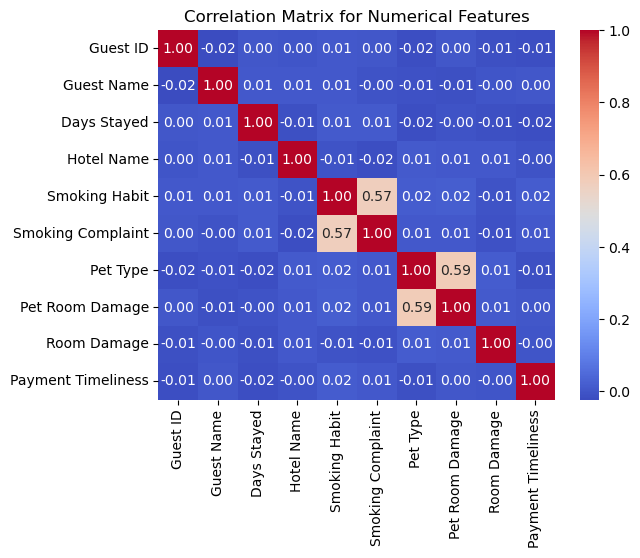

In [25]:
# Correlation Analysis
# Selecting only the numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Ploting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


array([[<Axes: title={'center': 'Days Stayed'}>,
        <Axes: title={'center': 'Guest ID'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

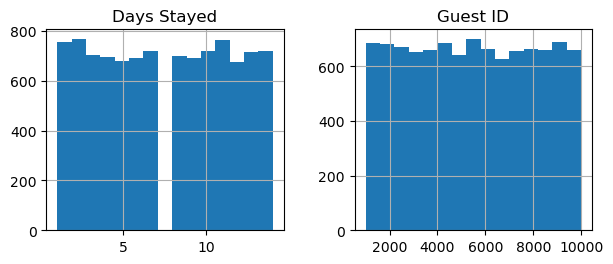

In [26]:
# Histograms for numerical variables
df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 4))

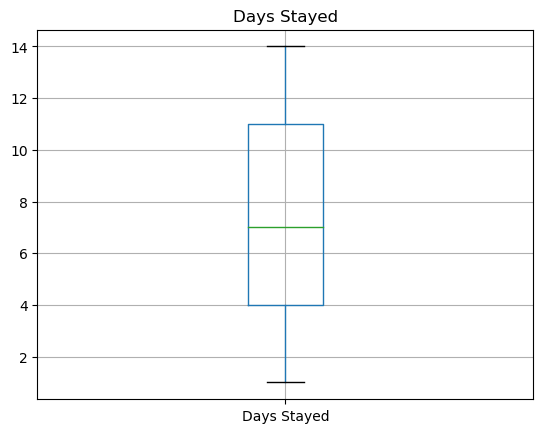

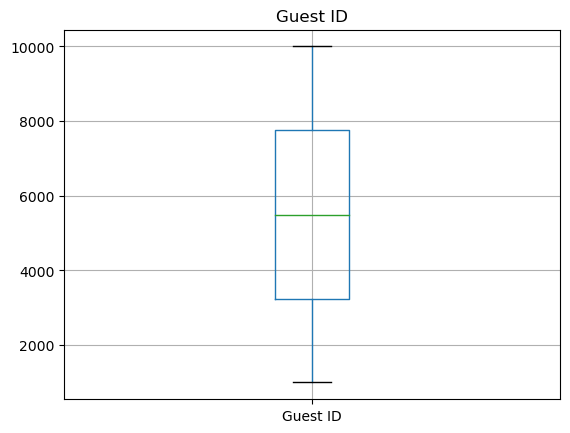

In [27]:
# Box plots for numerical data
for col in numerical_cols:
    df.boxplot(column=col)
    plt.title(col)
    plt.show()

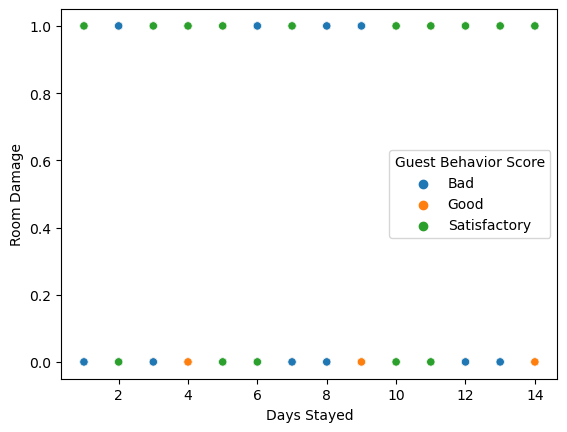

In [28]:
# Scatter plots for continuous variable relationships
sns.scatterplot(data=df, x='Days Stayed', y='Room Damage', hue='Guest Behavior Score')
plt.show()

In [29]:
print(df.columns)

Index(['Guest ID', 'Guest Name', 'Days Stayed', 'Hotel Name', 'Smoking Habit',
       'Smoking Complaint', 'Pet Type', 'Pet Room Damage', 'Room Damage',
       'Payment Timeliness', 'Guest Behavior Score'],
      dtype='object')


In [30]:

# 1. Statistical Summary for numerical columns
numerical_columns = ['Days Stayed', 'Pet Room Damage', 'Room Damage', 'Payment Timeliness']
df[numerical_columns].describe()

# 2. Categorical Distribution for categorical columns
categorical_columns = ['Guest ID', 'Guest Name', 'Hotel Name', 'Smoking Habit', 'Smoking Complaint', 'Pet Type', 'Guest Behavior Score']
for col in categorical_columns:
    print(f"Frequency distribution of {col}:\n{df[col].value_counts()}\n")


Frequency distribution of Guest ID:
Guest ID
3200.0    6
8778.0    6
7695.0    6
4580.0    6
9804.0    6
         ..
4456.0    1
9269.0    1
2776.0    1
8827.0    1
4312.0    1
Name: count, Length: 6067, dtype: int64

Frequency distribution of Guest Name:
Guest Name
2234    7
6425    5
2293    5
1696    4
3532    4
       ..
2741    1
8975    1
8464    1
3889    1
8043    1
Name: count, Length: 9361, dtype: int64

Frequency distribution of Hotel Name:
Hotel Name
0    2025
1    2021
2    2012
3    1994
4    1949
Name: count, dtype: int64

Frequency distribution of Smoking Habit:
Smoking Habit
1    5030
0    4971
Name: count, dtype: int64

Frequency distribution of Smoking Complaint:
Smoking Complaint
0    7497
1    2504
Name: count, dtype: int64

Frequency distribution of Pet Type:
Pet Type
1    5056
0    4945
Name: count, dtype: int64

Frequency distribution of Guest Behavior Score:
Guest Behavior Score
Bad             3380
Good            3311
Satisfactory    3310
Name: count, dtype: 

In [31]:
# 3. Correlation Analysis
correlation_matrix = df[numerical_columns].corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                     Days Stayed  Pet Room Damage  Room Damage  \
Days Stayed            1.000000        -0.004332    -0.011434   
Pet Room Damage       -0.004332         1.000000     0.010030   
Room Damage           -0.011434         0.010030     1.000000   
Payment Timeliness    -0.015170         0.002257    -0.001490   

                    Payment Timeliness  
Days Stayed                  -0.015170  
Pet Room Damage               0.002257  
Room Damage                  -0.001490  
Payment Timeliness            1.000000  


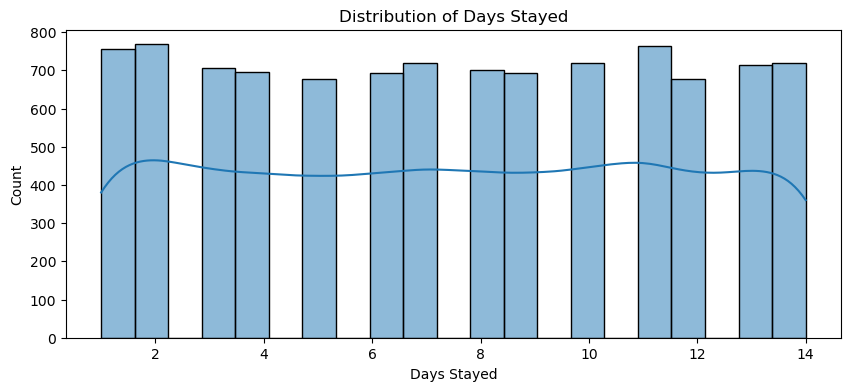

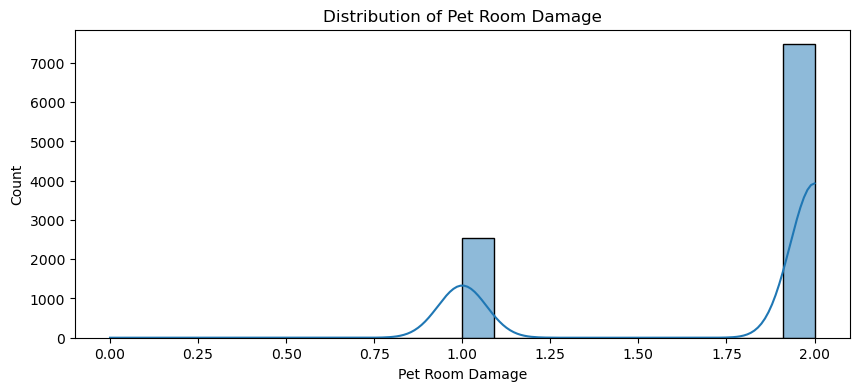

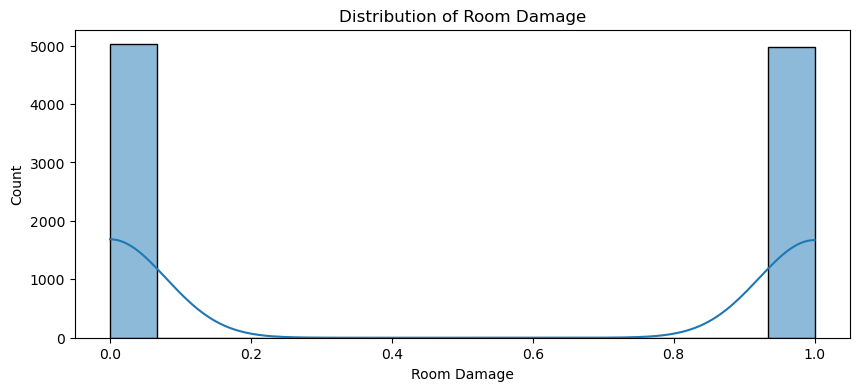

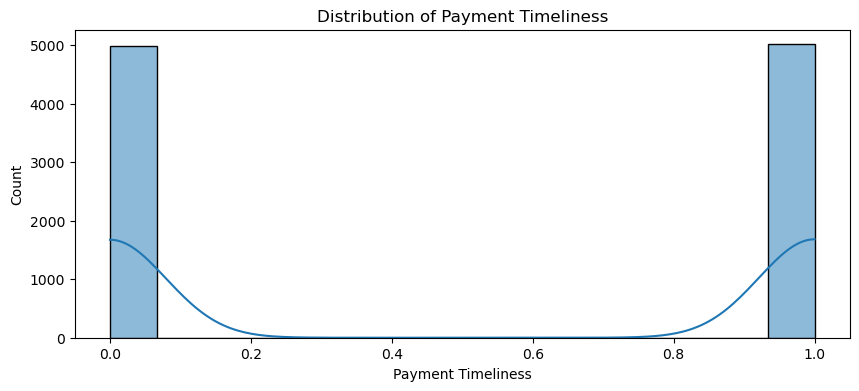

In [32]:
## Histograms for numerical variables
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


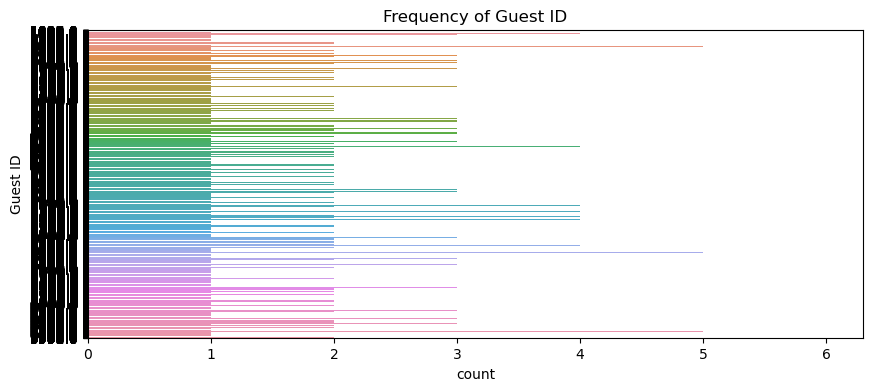

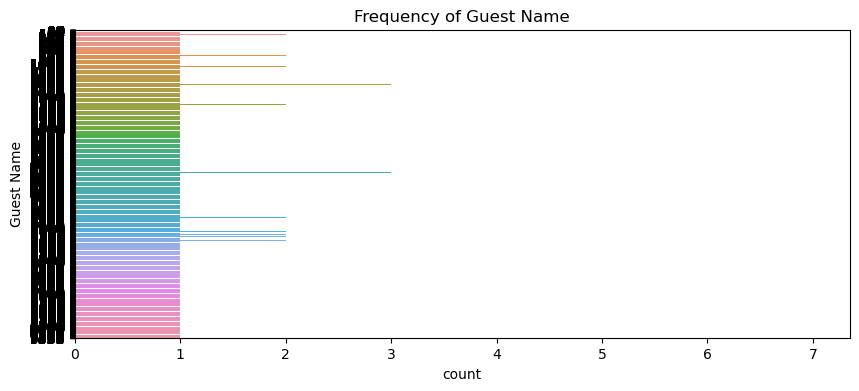

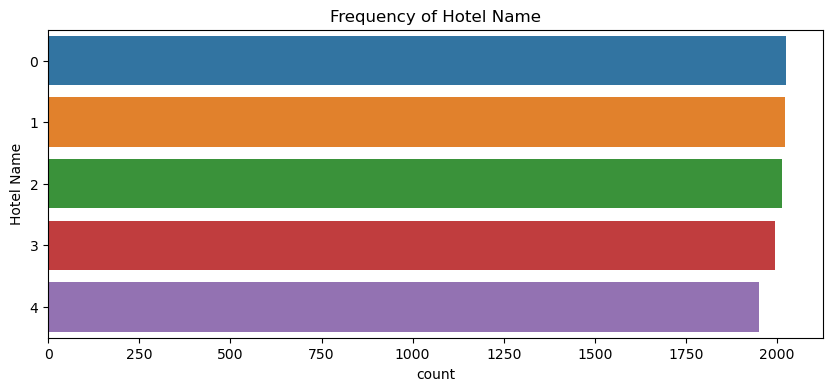

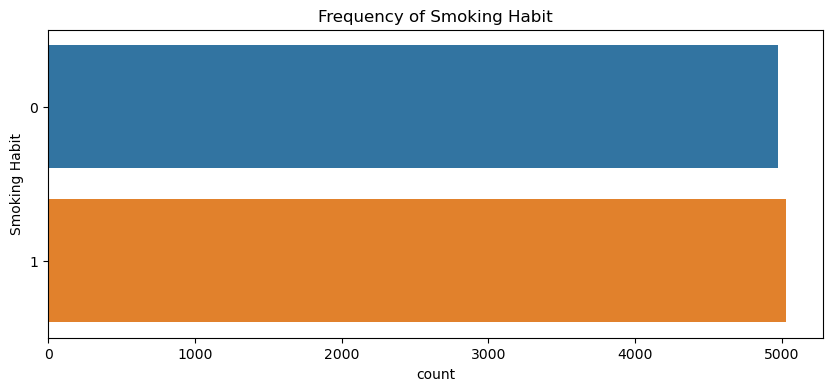

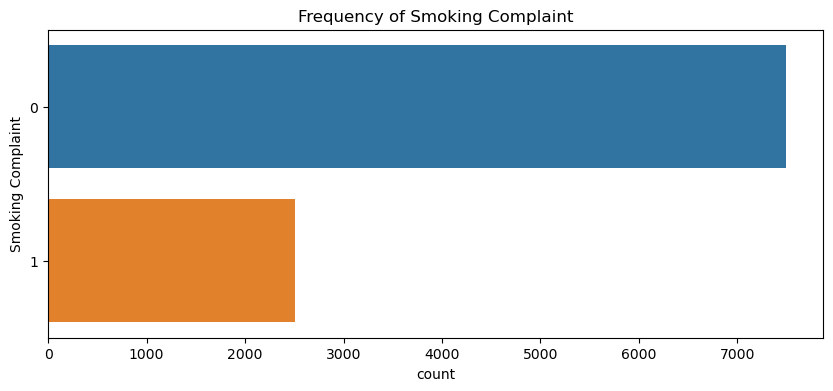

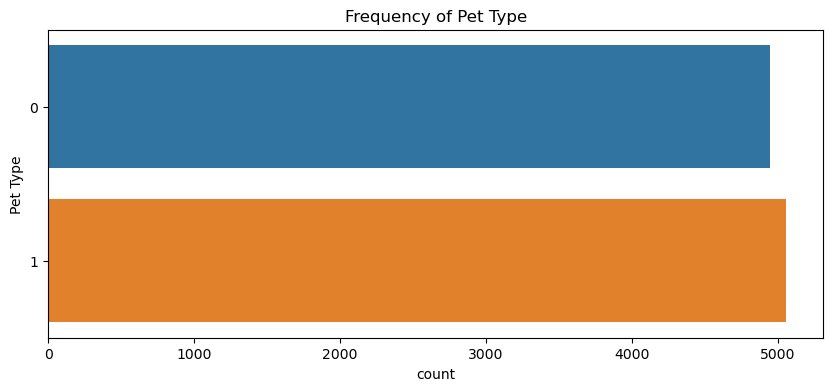

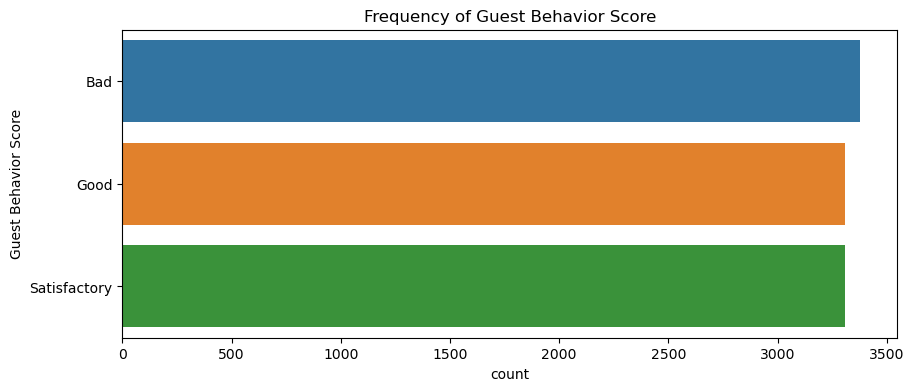

In [33]:
## Bar charts for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col])
    plt.title(f'Frequency of {col}')
    plt.show()

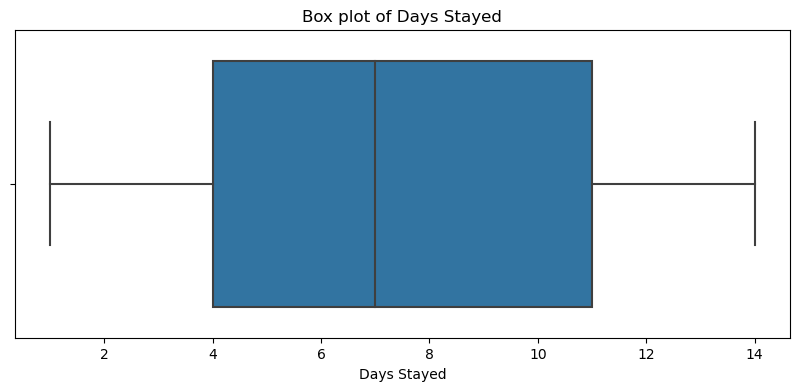

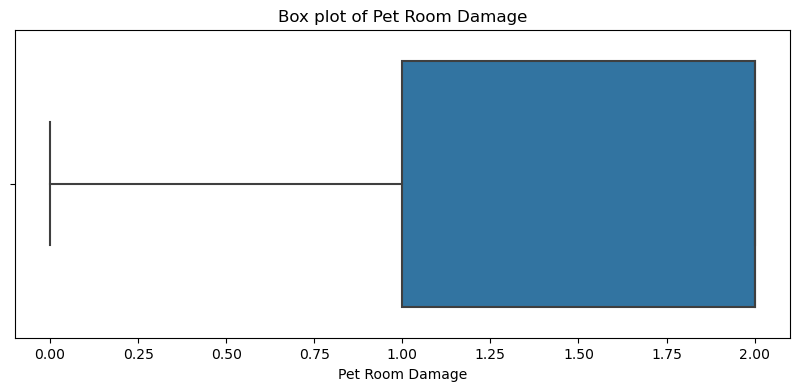

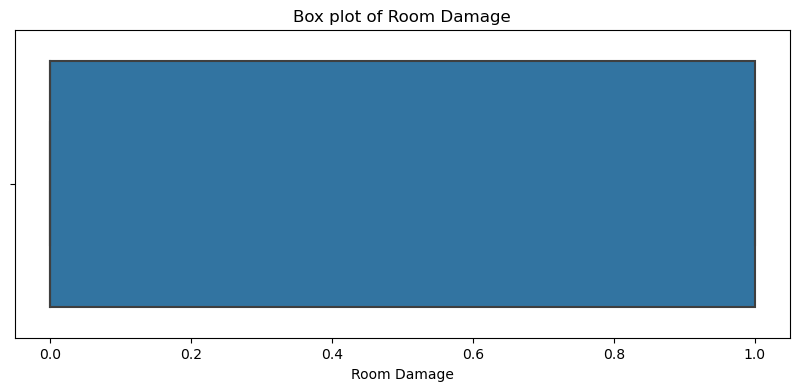

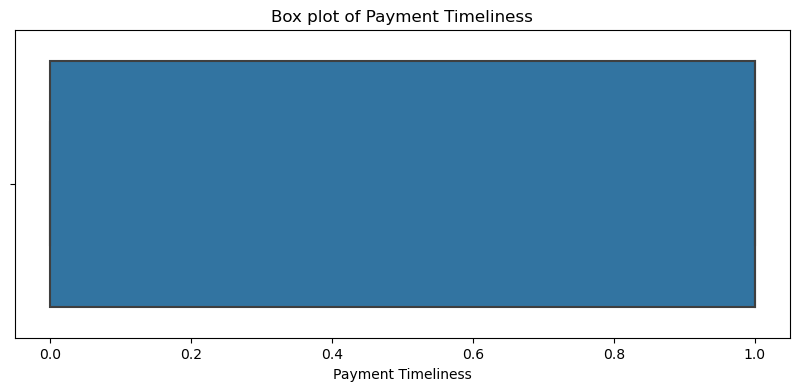

In [34]:
## Box plots for numerical data
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

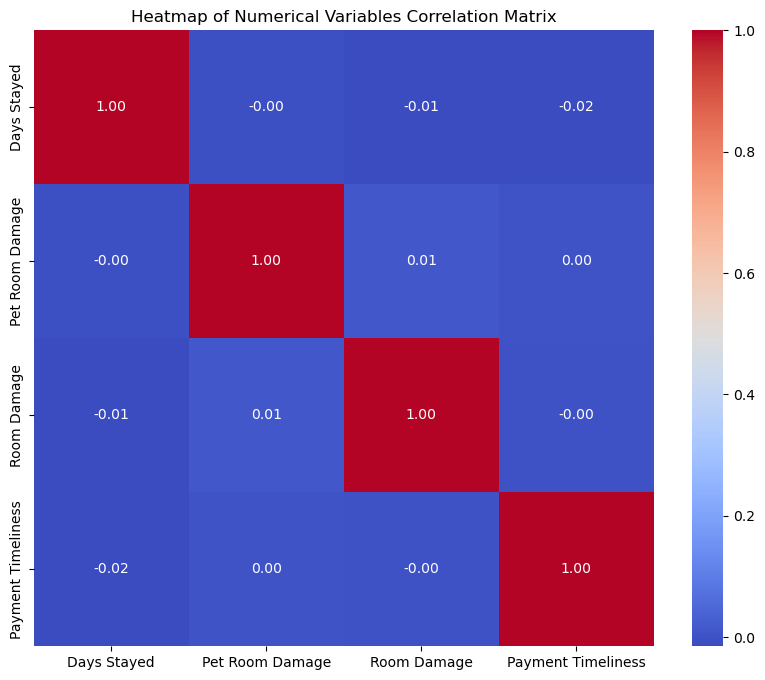

In [35]:
## Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Numerical Variables Correlation Matrix')
plt.show()

### Split the Dataset:

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop('Guest Behavior Score', axis=1)
y = df['Guest Behavior Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering

### Creating Interaction Features:

In [38]:
# Interaction between Hotel Name & Days Stayed 
df['RoomType_PreviousStays_Interaction'] = df['Hotel Name'] * df['Days Stayed']

### Updating Dataset After Feature Engineering:

In [39]:
X = df.drop('Guest Behavior Score', axis=1)
y = df['Guest Behavior Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection and Training

### Model Selection - RandomForestClassifier:

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluating the Model:

In [41]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.34      0.35      0.34       690
        Good       0.31      0.32      0.31       648
Satisfactory       0.33      0.30      0.32       663

    accuracy                           0.33      2001
   macro avg       0.33      0.32      0.32      2001
weighted avg       0.33      0.33      0.33      2001

Accuracy: 0.32533733133433285


## Hyperparameter Tuning

### Tune Hyperparameters using GridSearchCV:

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

### Retraining the Model with Best Parameters:

In [43]:
best_params = grid_search.best_params_
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, random_state=42)

### Final Model Evaluation:

In [44]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Final Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.33      0.34      0.33       690
        Good       0.30      0.33      0.31       648
Satisfactory       0.34      0.30      0.32       663

    accuracy                           0.32      2001
   macro avg       0.32      0.32      0.32      2001
weighted avg       0.32      0.32      0.32      2001

Final Accuracy: 0.32283858070964516


Now to try to increase the model accuracy So Trying To Apply Difrrent Algorithims to this model to check the better performer

## 1. Gradient Boosting 

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fiting the model
gb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

              precision    recall  f1-score   support

         Bad       0.36      0.41      0.38       690
        Good       0.33      0.33      0.33       648
Satisfactory       0.35      0.30      0.32       663

    accuracy                           0.35      2001
   macro avg       0.35      0.35      0.35      2001
weighted avg       0.35      0.35      0.35      2001

Accuracy: 0.34832583708145926


## 2. Support Vector Machines (SVM)

In [46]:
from sklearn.svm import SVC

# Initializing the Support Vector Classifier
svm_model = SVC(random_state=42)

# Fiting the model
svm_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

         Bad       0.34      0.74      0.46       690
        Good       0.28      0.16      0.21       648
Satisfactory       0.27      0.04      0.08       663

    accuracy                           0.32      2001
   macro avg       0.30      0.32      0.25      2001
weighted avg       0.30      0.32      0.25      2001

Accuracy: 0.3233383308345827


Based on the results which we got, the Gradient Boosting Classifier (GBC) performed the best among the other three models, with an accuracy of approximately 0.35. However, there's is still room for improvement.

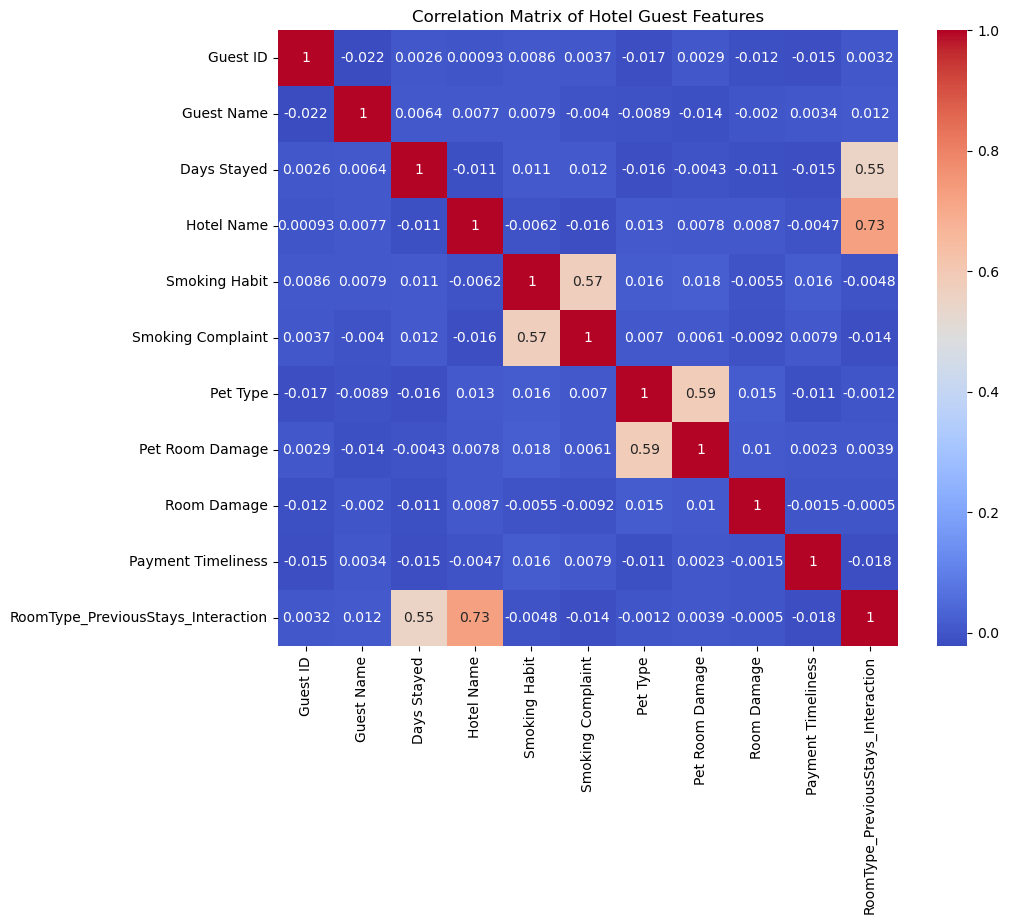

In [48]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Now you can plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Hotel Guest Features')
plt.show()


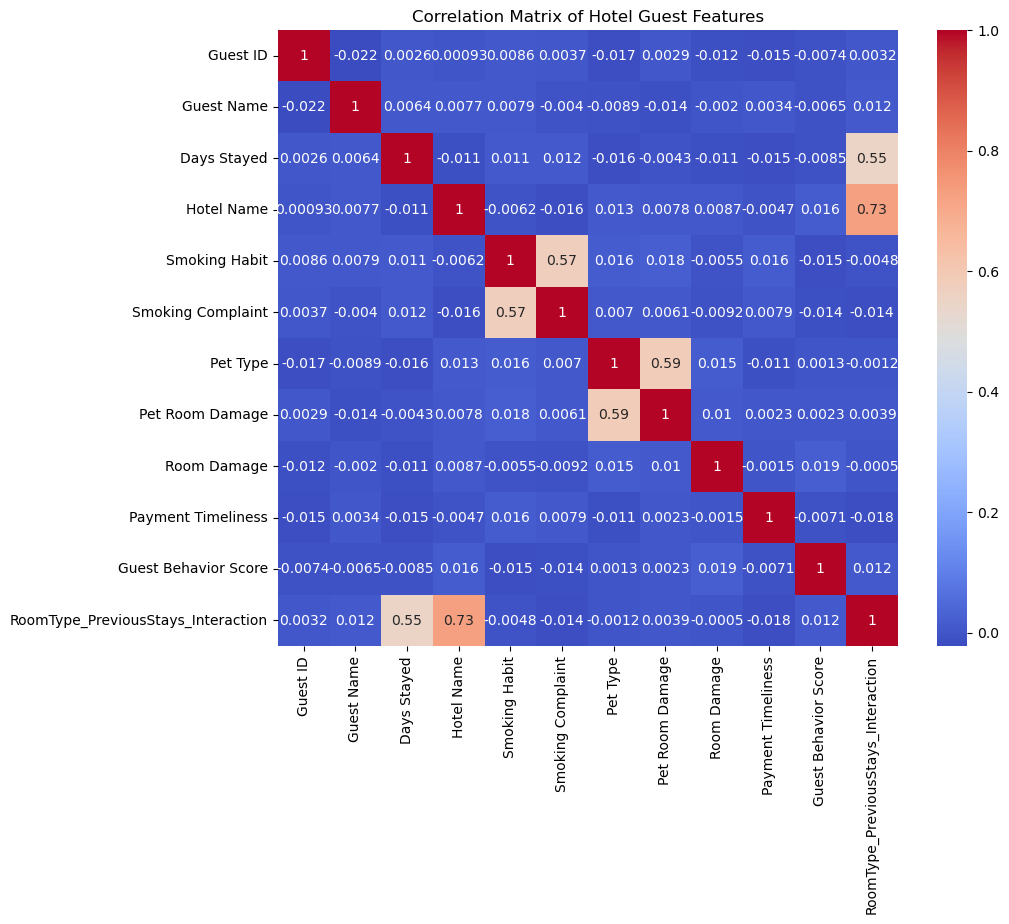

In [49]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid changing the original one
df_encoded = df.copy()

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now you can calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# And plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Hotel Guest Features')
plt.show()


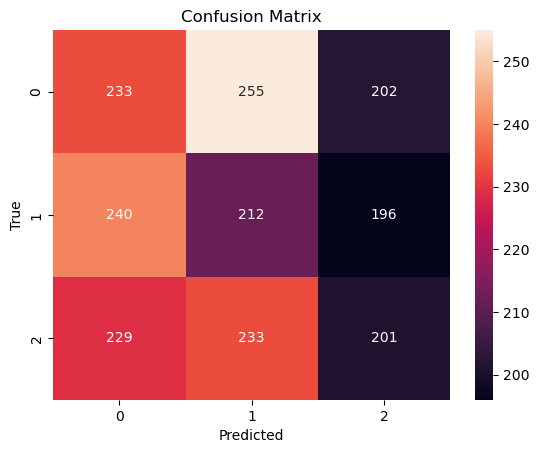

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()